<a href="https://colab.research.google.com/github/himaneetripathi/Parkinson-s-disease-prediction/blob/main/Project2_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinsons Data Set

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%)

MDVP:Jitter(Abs)

MDVP:RAP

MDVP:PPQ

Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer

MDVP:Shimmer(dB)

Shimmer:APQ3

Shimmer:APQ5

MDVP:APQ

Shimmer:DDA - Several measures of variation in amplitude


NHR,HNR - Two measures of ratio of noise to tonal components in the voice


status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1

spread2

PPE - Three nonlinear measures of fundamental frequency variation


Relevant Papers:N/A


Citation Request:

The following paper: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)



In [88]:
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive" , force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [89]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

1) Source of data - The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado.



2) Brief description of data- They recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

3) What is the target- status

4) Is this a classification or regression problem - Classification

5) How many features - 24

6) How many rows of data - 195 rows X 24 columns

7)Any, challenges do you see in cleaning, exploring, or modeling with this dataset- The data has no missing values.

In [91]:
df.duplicated().sum()

0

The data has no duplicates.

In [92]:
# Identifying missing values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

The Data has no Missing Values.

Identifying any moderate or strong correlations between Target and pther Features.

In [93]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [94]:
df.groupby('status')['NHR'].mean()
#grouping by two columns status and NHR

status
0    0.011483
1    0.029211
Name: NHR, dtype: float64

Grouping status with mean of NHR.

In [95]:
df.groupby('status')['HNR'].mean()

status
0    24.678750
1    20.974048
Name: HNR, dtype: float64

Grouping status with mean of HNR.

In [96]:
df.groupby(['status', 'D2'])['PPE'].mean()
#grouping by three columns status, D2

status  D2      
0       1.423287    0.044539
        1.512275    0.096320
        1.544609    0.056141
        1.743867    0.085569
        1.840198    0.103561
                      ...   
1       3.184027    0.454721
        3.274865    0.418646
        3.317586    0.301952
        3.413649    0.457533
        3.671155    0.332086
Name: PPE, Length: 195, dtype: float64

Grouping status with means of D2 and PPE.

In [97]:
df.groupby(['status', 'MDVP:Jitter(%)'])['MDVP:Jitter(Abs)'].mean()

status  MDVP:Jitter(%)
0       0.00178           0.000009
        0.00180           0.000009
        0.00185           0.000007
        0.00198           0.000010
        0.00205           0.000009
                            ...   
1       0.01936           0.000150
        0.02714           0.000140
        0.03011           0.000220
        0.03107           0.000160
        0.03316           0.000260
Name: MDVP:Jitter(Abs), Length: 181, dtype: float64

Grouping status with means of MDVP:Jitter(%) and MDVP:Jitter(Abs).

#Visualization of DATA

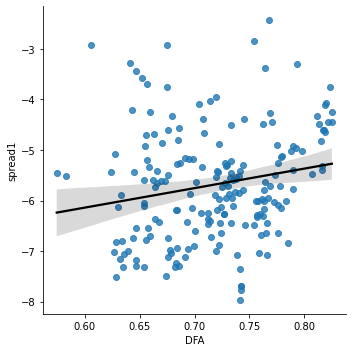

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=df , x='DFA' , y='spread1' ,line_kws ={'color' : 'black'} )


The above scatter plot shows a positive corelation between DFA with spread1 values.

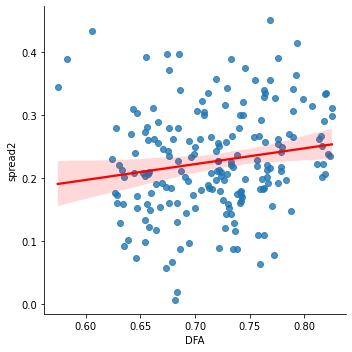

In [99]:
sns.lmplot(data=df , x='DFA' , y='spread2' ,line_kws ={'color' : 'red'} )

The above scatter plot shows a positive corelation between DFA with spread2 values.

<function matplotlib.pyplot.show>

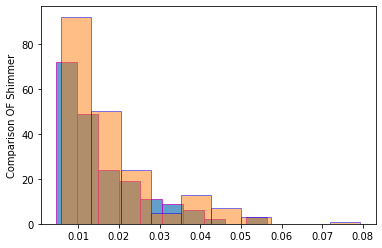

In [100]:
plt.ylabel('Comparison OF Shimmer')     #histograph showing comparison of Shimmer(Apq3 and Apq5)
y1 = df['Shimmer:APQ3']
y2 = df['Shimmer:APQ5']
plt.hist(y1 , alpha = .7 , edgecolor = 'm')
plt.hist(y2 , alpha = .5 , edgecolor = 'b' )
plt.show

The above graph shows comparision of Shimmer:APQ3 and Shimmer:APQ5.

<function matplotlib.pyplot.show>

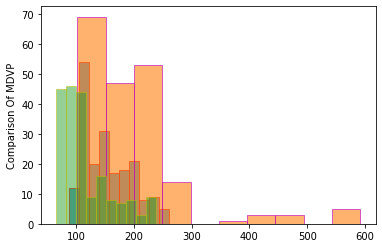

In [101]:
plt.ylabel('Comparison Of MDVP')    
y1 = df['MDVP:Fo(Hz)']
y2 = df['MDVP:Fhi(Hz)']
y3 = df['MDVP:Flo(Hz)']
plt.hist(y1 , alpha = .7 , edgecolor = 'r')
plt.hist(y2 , alpha = .6 , edgecolor = 'm' )
plt.hist(y3 , alpha = .5 , edgecolor = 'y')
plt.show

The above graph shows comparision of different MDVP values.

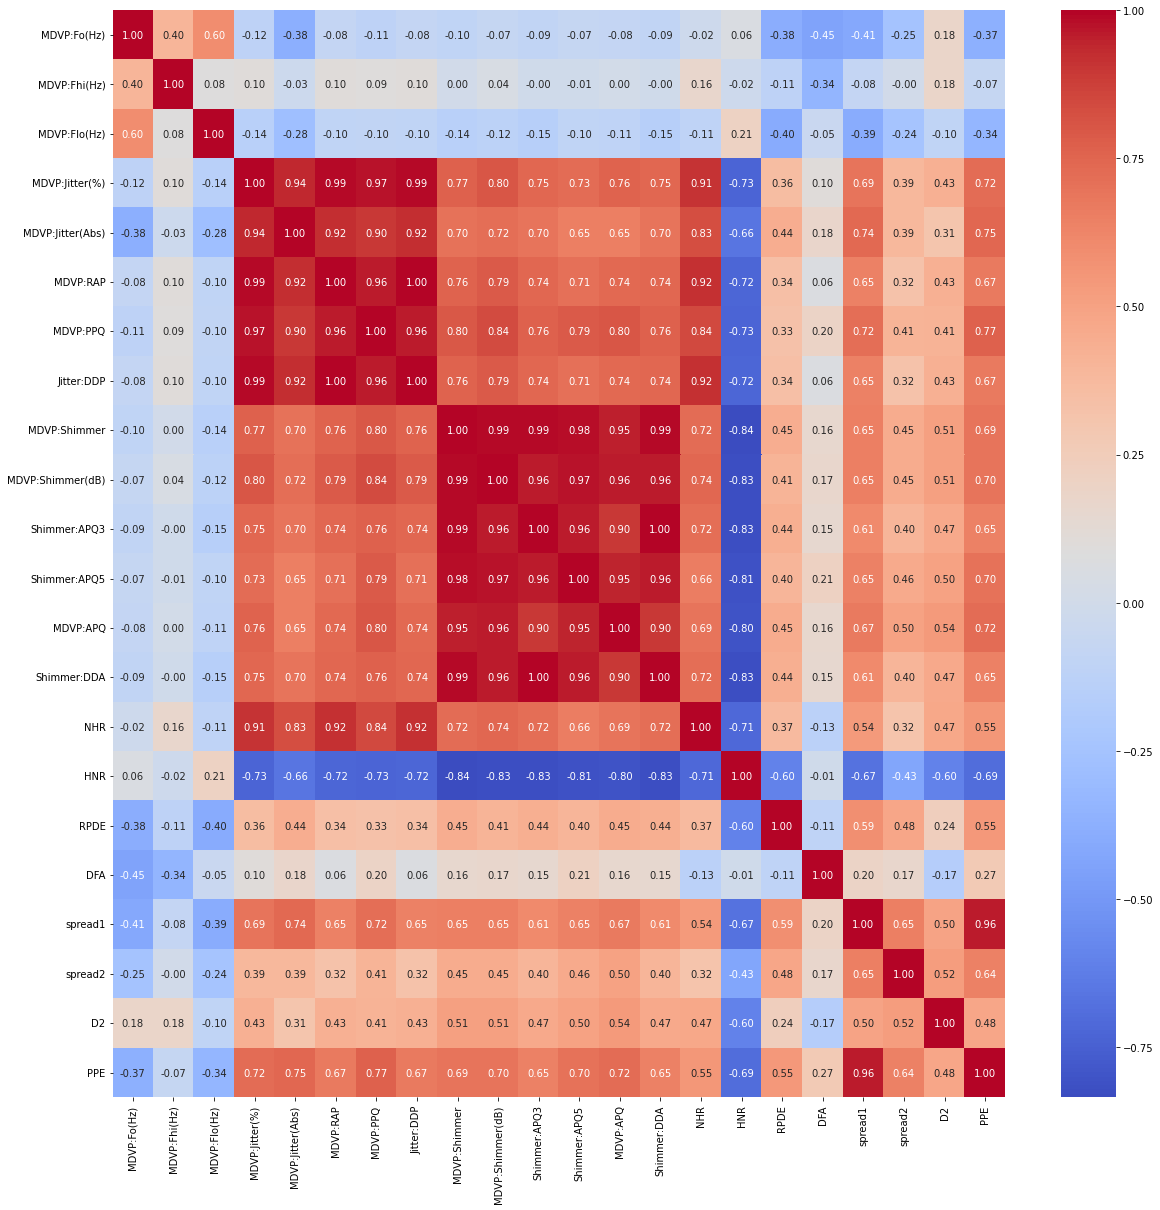

In [102]:

corr = df.drop(columns='status').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

The Heatmap showing corelation between various features.
A score of 0.5 or above shows positive corelation while a lower score like 0.1, or a negative score shows negative corelation.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#PREPROCESSING

In [104]:
# Separating the target and features.  
X = df.drop(columns=['status', 'name'])
y = df['status']

In [105]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Trying multiple models to optimize model performance

1. KNeighbors Classifier

In [106]:
# Instantiating Standard Scaler as all columns are numeric
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# Fitting & transforming data.
scaled_X = scaler.fit_transform(X)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a transformer pipeline
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(StandardScaler(), knn)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [108]:
print('Training accuracy:', knn_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pipe.score(X_test, y_test))

Training accuracy: 0.952054794520548
Testing accuracy: 0.8979591836734694


In [109]:
predictions1 = knn_pipe.predict(X_test)
predictions1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.90      0.97      0.94        38

    accuracy                           0.90        49
   macro avg       0.89      0.81      0.84        49
weighted avg       0.90      0.90      0.89        49



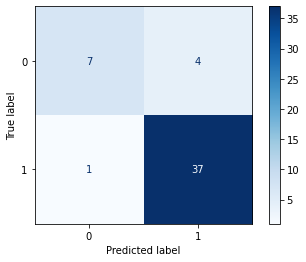

In [110]:
 #import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay   
train_report1 = classification_report(y_test, predictions1)    
print(train_report1)

# evaluate model
 
#make predictions
y_preds = knn_pipe.predict(X_test)
import numpy as np
 
# round the predictions
y_preds = np.round(y_preds)
 
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

2. Decision Tree Classifier


In [111]:
#Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier


In [112]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [113]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
# calculating classification accuracy
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8775510204081632


In [115]:
predictions2 = dec_tree.predict(X_test)
predictions2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0])

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.90      0.95      0.92        38

    accuracy                           0.88        49
   macro avg       0.84      0.79      0.81        49
weighted avg       0.87      0.88      0.87        49



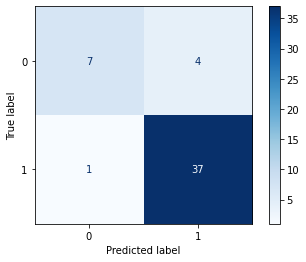

In [116]:
train_report2 = classification_report(y_test, predictions2)     # for decision tree using predictions2
print(train_report2)

y2_preds = dec_tree.predict(X_test)
# round the predictions
y2_preds = np.round(y_preds)
 
 
ConfusionMatrixDisplay.from_predictions(y_test, y2_preds, cmap='Blues');

3. Dummy Classifier


In [117]:
#Importing the Classifiers
from sklearn.dummy import DummyClassifier

In [118]:
dummy_tree = DummyClassifier(random_state=42)

In [119]:
dummy_tree.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [120]:
# calculating classification accuracy
train_score1 = dummy_tree.score(X_train, y_train)
test_score1 = dummy_tree.score(X_test, y_test)
print(train_score1)
print(test_score1)

0.7465753424657534
0.7755102040816326


In [121]:
predictions3 = dummy_tree.predict(X_test)
predictions3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.78      1.00      0.87        38

    accuracy                           0.78        49
   macro avg       0.39      0.50      0.44        49
weighted avg       0.60      0.78      0.68        49



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


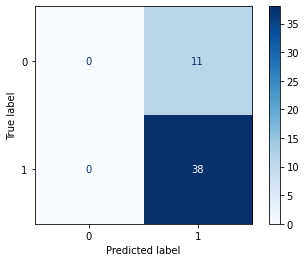

In [122]:
train_report3 = classification_report(y_test, predictions3)  #for dummy tree using predictions3  
print(train_report3)

y3_preds = dummy_tree.predict(X_test)
# round the predictions
y3_preds = np.round(y3_preds)
 
 
ConfusionMatrixDisplay.from_predictions(y_test, y3_preds, cmap='Blues');

By applying different models we can see that KNeighbors Classifier and Decision Tree Classifier are giving the best score.

Performing PCA technique on our Data set  

In [123]:
from sklearn.decomposition import PCA
# Instantiating & fitting PCA on scaled data
pca = PCA()
scaled_X = scaler.fit_transform(X)
pca.fit(scaled_X)
# Creating a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=0.90))

In [124]:
knn_pca_pipe = make_pipeline(transformer, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.9))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [125]:
print('Training accuracy:', knn_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe.score(X_test, y_test))

Training accuracy: 0.9452054794520548
Testing accuracy: 0.8979591836734694


In [126]:
dec_tree_pca_pipe = make_pipeline(transformer, dec_tree)
dec_tree_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.9))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [127]:
print('Training accuracy:', dec_tree_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', dec_tree_pca_pipe.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8979591836734694


Applying PCA is slightly changing the result.

So Decision Tree Classifier is giving best score.